In [1]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random

In [2]:
nPoints = 1000

In [3]:
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints+1)]
X = [[s] for s in xPlot]

np.random.seed(1)
Y = [s+np.random.normal(scale = 0.1) for s in xPlot]

<function matplotlib.pyplot.show>

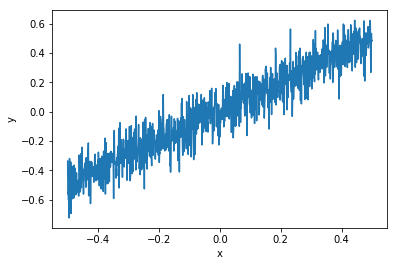

In [4]:
plot.plot(xPlot, Y)
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=4)
len_x_train = len(X_train)
len_x_test = len(X_test)
len_y_train = len(Y_train)
len_y_test = len(Y_test)

print(f'len_x_train = {len_x_train}')
print(f'len_x_test = {len_x_test}')
print(f'len_y_train = {len_y_train}')
print(f'len_y_trst = {len_y_test}')

len_x_train = 700
len_x_test = 301
len_y_train = 700
len_y_trst = 301


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [8]:
#scores = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
scores = ['neg_mean_squared_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(SVR(), tuned_parameters, cv=10, scoring = score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (-mean, -std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    Y_true, Y_pred = Y_test, clf.predict(X_test)
    print(f'mean_squared_error = {mean_squared_error(Y_true, Y_pred)}')
    #print(classification_report(Y_true, Y_pred))
    print()

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.053 (+/--0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.088 (+/--0.017) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.012 (+/--0.003) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.053 (+/--0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.010 (+/--0.003) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.012 (+/--0.003) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.010 (+/--0.003) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.010 (+/--0.003) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.010 (+/--0.003) for {'C': 1, 'kernel': 'linear'}
0.010 (+/--0.003) for {'C': 10, 'kernel': 'linear'}
0.010 (+/--0.003) for {'C': 100, 'kernel': 'linear'}
0.010 (+/--0.003) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores ar